In [27]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib
%pip list

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\bdbag\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\bdbag\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\bdbag\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\bdbag\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
       

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
bcrypt                        3.2.0
beautiful

In [7]:
# Import Dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [29]:
# Verifying correct data separation
os.listdir('chest_xray/train')
os.listdir('chest_xray/test')

['NORMAL', 'PNEUMONIA']

In [30]:
# Checking image size
img = cv2.imread(os.path.join('chest_xray', 'train', 'NORMAL', 'NORMAL-28501-0001.jpeg'))
img.shape

(2418, 2434, 3)

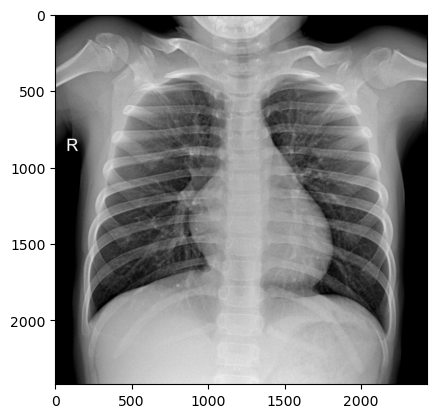

In [31]:
# Example image
plt.imshow(img)

In [32]:
# # Image Preprocessing Function
# def process_images(image_dir):
#     for image_class in os.listdir(image_dir):
#         for image in os.listdir(os.path.join(image_dir, image_class)):
#             image_path = os.path.join(image_dir, image_class, image)
            

# train_dir = 'chest_xray/train'
# test_dir = 'chest_xray/test'
# process_images(train_dir)
# process_images(test_dir)


In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def process_images(image_dir, train_split=0.):
    train_output_dir = 'processed_data/train'
    val_output_dir = 'processed_data/validation'

    for image_class in os.listdir(image_dir):
        # Create directories for each class in train and validation sets
        os.makedirs(os.path.join(train_output_dir, image_class), exist_ok=True)
        os.makedirs(os.path.join(val_output_dir, image_class), exist_ok=True)

        images = os.listdir(os.path.join(image_dir, image_class))
        images = [os.path.join(image_class, img) for img in images]
        
        train_images, val_images = train_test_split(images, train_size=train_split, stratify=[image_class]*len(images))

        # Move images to appropriate directories
        for image in train_images:
            src = os.path.join(image_dir, image)
            dst = os.path.join(train_output_dir, image)
            shutil.copyfile(src, dst)

        for image in val_images:
            src = os.path.join(image_dir, image)
            dst = os.path.join(val_output_dir, image)
            shutil.copyfile(src, dst)

process_images('chest_xray/train', train_split=0.7)
test_data = 'chest_xray/test'


In [2]:
# Import TensorFlow's data module
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the directories as TensorFlow datasets
train_data = image_dataset_from_directory('processed_data/train')
val_data = image_dataset_from_directory('processed_data/validation')
test_data = image_dataset_from_directory('chest_xray/test')

# Now you can create the iterators
train_iterator = train_data.as_numpy_iterator()
val_iterator = val_data.as_numpy_iterator()
test_iterator = test_data.as_numpy_iterator()



Found 4909 files belonging to 2 classes.
Found 2294 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [3]:
# train_batch = train_iterator.next()
# val_batch = val_iterator.next()
test_batch = test_iterator.next()

In [31]:
# train_batch[0].shape
# val_batch[0].shape
test_batch[0].shape

(32, 256, 256, 3)

In [5]:
train_batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

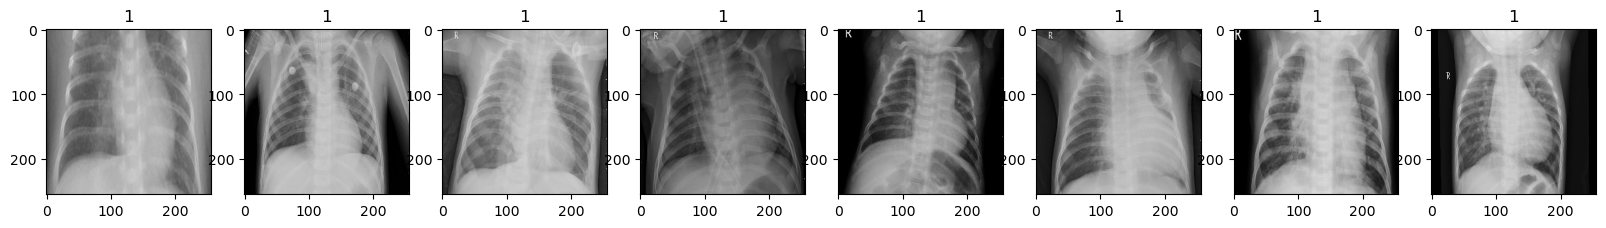

In [8]:
fig, ax = plt.subplots(ncols=8 ,figsize=(20, 20))
for i , img in enumerate(train_batch[0][:8]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(train_batch[1][i])
    

### The "1" Classification indicates a pneumonia positive image ###

In [9]:
train_batch[0].min(), train_batch[0].max()

(0.0, 255.0)

In [10]:
scaled = train_batch[0] / 255

In [11]:
scaled.min(), scaled.max()

(0.0, 1.0)

# PreProcessing

In [12]:
preprocess_data = train_data.map(lambda x, y: (x/255, y))

In [13]:
preprocess_data.as_numpy_iterator().next()[0].max()

1.0

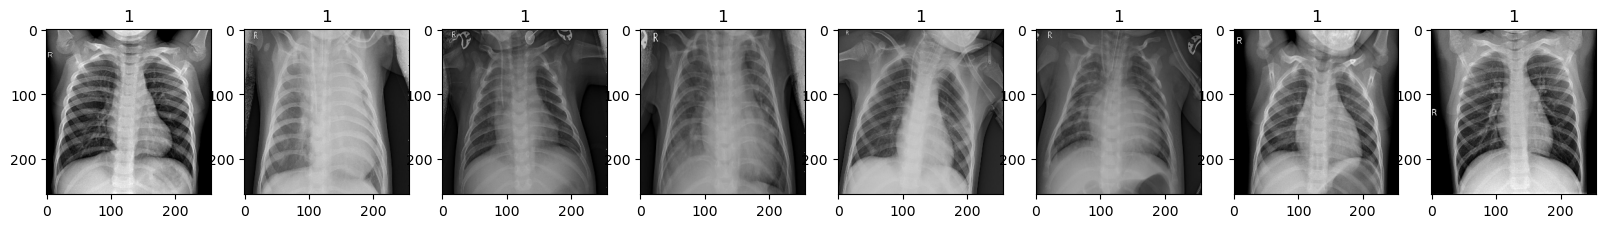

In [14]:
fig, ax = plt.subplots(ncols=8 ,figsize=(20, 20))
for i, img in enumerate(preprocess_data.as_numpy_iterator().next()[0][:8]):
    ax[i].imshow(img)
    ax[i].title.set_text(train_batch[1][i])

### CNN Model Construction ###

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
# Convulational Layer #1
model.add(Conv2D(16, (3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
# Convulational Layer #2
model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
# Convulational Layer #3
model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
# Flatten Layer
model.add(Flatten())
# Dense Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        

In [24]:
# Model Training
train_regime = model.fit(train_data, epochs=5, validation_data=val_data)


Epoch 1/5
154/154 [==============================] - 22s 143ms/step - loss: 3.5581 - accuracy: 0.8902 - val_loss: 0.2098 - val_accuracy: 0.9320
Epoch 2/5
154/154 [==============================] - 23s 147ms/step - loss: 0.1568 - accuracy: 0.9536 - val_loss: 0.0891 - val_accuracy: 0.9717
Epoch 3/5
154/154 [==============================] - 23s 148ms/step - loss: 0.0525 - accuracy: 0.9825 - val_loss: 0.0504 - val_accuracy: 0.9878
Epoch 4/5
154/154 [==============================] - 22s 143ms/step - loss: 0.0187 - accuracy: 0.9957 - val_loss: 0.0375 - val_accuracy: 0.9917
Epoch 5/5
154/154 [==============================] - 22s 143ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.0452 - val_accuracy: 0.9926


In [20]:
train_regime.history

{'loss': [0.24718551337718964,
  0.11014042049646378,
  0.08415111154317856,
  0.06945164501667023,
  0.05690024048089981],
 'accuracy': [0.907924234867096,
  0.9588510990142822,
  0.9674068093299866,
  0.974332869052887,
  0.9792218208312988],
 'val_loss': [11.28141975402832,
  20.13316535949707,
  32.545108795166016,
  26.016895294189453,
  11.742541313171387],
 'val_accuracy': [0.9638186693191528,
  0.9489973783493042,
  0.9093286991119385,
  0.9494333267211914,
  0.9721011519432068]}

In [25]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


20/20 [==============================] - 1s 39ms/step - loss: 2.2185 - accuracy: 0.8109
Test Loss: 2.218498468399048
Test Accuracy: 0.8108974099159241


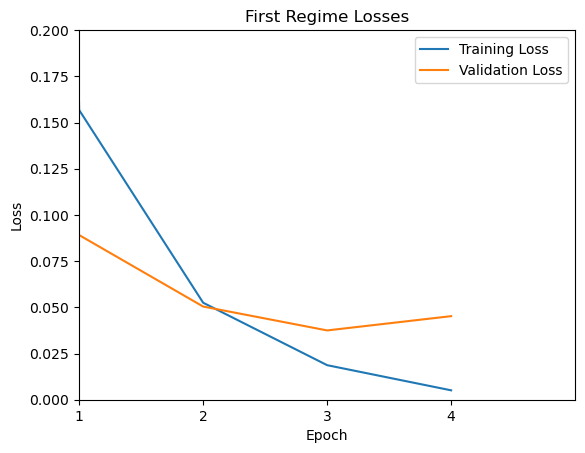

In [28]:
plt.plot(train_regime.history['loss'], label='Training Loss')
plt.plot(train_regime.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0,5))
plt.xlim(1,5)
plt.ylim(0,.2)
plt.title('First Regime Losses')
plt.legend()
plt.show()


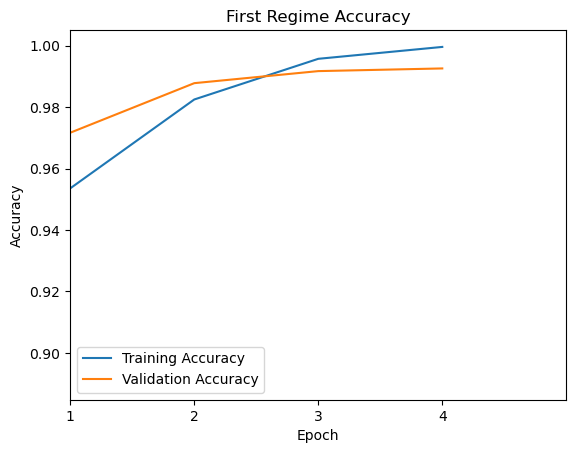

In [29]:
plt.plot(train_regime.history['accuracy'], label='Training Accuracy')
plt.plot(train_regime.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0, 5))
plt.xlim(1,5)
plt.title('First Regime Accuracy')
plt.legend()
plt.show()


In [30]:
test_regime = model.fit(test_data, epochs=2)

Epoch 1/4


20/20 [==============================] - 3s 115ms/step - loss: 0.7707 - accuracy: 0.8606
Epoch 2/4
20/20 [==============================] - 2s 109ms/step - loss: 0.1627 - accuracy: 0.9343
Epoch 3/4
20/20 [==============================] - 3s 112ms/step - loss: 0.0569 - accuracy: 0.9856
Epoch 4/4
20/20 [==============================] - 2s 112ms/step - loss: 0.0310 - accuracy: 0.9936
